### Pre-process polblogs datasets  
Goal : make input polblogs files suitable for the algorithm.

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# import wget

In [2]:
%matplotlib notebook

In [3]:
def reciprocal_edges(G):
    N=G.number_of_nodes()
    nodes=list(G.nodes())
    edges=G.edges()
    unique_edges=[]
    reciprocal_list=[]
    for idxi in range(N):
        i=nodes[idxi]
        for idxj in range(idxi+1,N):
            j=nodes[idxj]
            if (i,j) in edges or (j,i) in edges: 
                unique_edges.append((i,j))
                if (i,j) in edges and (j,i) in edges: 
                    reciprocal_list.append((i,j))

    unique_edges = list(set(unique_edges))
    reciprocal = len(reciprocal_list)
 
    print("reciprocal:", reciprocal,len(unique_edges),"reciprocity:",reciprocal/float(len(unique_edges)),reciprocal/float(len(unique_edges)+reciprocal)) 
    return  unique_edges, reciprocal_list


In [4]:
!pwd

/Users/hsafdari/Dropbox/Dr_Caterina_de_Bacco/anomaly detection/data/input


In [5]:
!ls

RD                                 pre-process_dataset-polbooks.ipynb
data_description.md                pre-process_dataset.ipynb
dutch2.dat                         pre-process_facebookwaall.ipynb
dutch6.dat                         syn_500_3_20.0_0.8_True_0.dat
facebook-wosn-wall.dat             synthetic
pok_month0.dat                     test.ipynb
polblogs                           theta_500_3_20.0_0.8_True_0.npz
polbooks                           twitter.dat
pre-process_WikiTalkht.ipynb       u.dat
pre-process_dataset-POK0.ipynb     v.dat
pre-process_dataset-polblogs.ipynb wiki_talk_ht.dat


In [6]:
outnet = 'polblogs'
H = nx.read_gml("polblogs/polblogs.gml")
edge_list = H.edges 
node_list = H.nodes

In [10]:
H.nodes(data=True)

NodeDataView({'100monkeystyping.com': {'value': 0, 'source': 'Blogarama'}, '12thharmonic.com/wordpress': {'value': 0, 'source': 'BlogCatalog'}, '40ozblog.blogspot.com': {'value': 0, 'source': 'Blogarama,BlogCatalog'}, '4lina.tblog.com': {'value': 0, 'source': 'Blogarama'}, '750volts.blogspot.com': {'value': 0, 'source': 'Blogarama'}, '95theses.blogspot.com': {'value': 0, 'source': 'Blogarama'}, 'abbadabbaduo.blogspot.com': {'value': 0, 'source': 'Blogarama,LeftyDirectory'}, 'aboutpolitics.blogspot.com': {'value': 0, 'source': 'Blogarama,eTalkingHead'}, 'achingandspinning.blogspot.com': {'value': 0, 'source': 'Blogarama'}, 'ackackack.com': {'value': 0, 'source': 'BlogCatalog'}, 'adamtalib.blogspot.com': {'value': 0, 'source': 'Blogarama'}, 'adviceforlefty.blogspot.com': {'value': 0, 'source': 'Blogarama,BlogCatalog,CampaignLine'}, 'agonist.org': {'value': 0, 'source': 'LeftyDirectory'}, 'aintnobaddude.com': {'value': 0, 'source': 'LeftyDirectory,CampaignLine'}, 'ajbenjaminjr.blogspot.co

### Build multigraph

In [78]:
G = nx.MultiDiGraph() 
G.add_nodes_from(H.nodes(data=True))
# G.add_weighted_edges_from(H.edges)

In [65]:
for i in H.edges:
    dat = G.get_edge_data(i[0], i[1])
    print(dat)

{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight'

{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight'

{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight'

{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight'

{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight'

{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight': 1.0}}
{0: {'weight'

In [10]:
# for i in H.nodes:
#     G.add_node(i)

In [79]:
edges = []
for i in H.edges: 
    if i[2] == 1:
        G.add_weighted_edges_from([(i[0], i[1], 2.)])
        edges.append((i[0], i[1]))
    elif i[2] == 0 and (i[0], i[1]) not in edges:
        G.add_weighted_edges_from([(i[0], i[1], 1.)])

In [83]:
for i in G.edges:
    dat = G.get_edge_data(i[0], i[1])
    if dat[0].values() == 2:
        print(dat[0])

In [31]:
list(G.edges())[0:5]

[]

In [33]:
edge_listg = H.edges

In [64]:
G.edges

OutMultiEdgeView([('100monkeystyping.com', 'rudepundit.blogspot.com', 0), ('100monkeystyping.com', 'townhall.com/clog', 0), ('100monkeystyping.com', 'tbogg.blogspot.com', 0), ('100monkeystyping.com', 'americablog.blogspot.com', 0), ('100monkeystyping.com', 'powerlineblog.com', 0), ('100monkeystyping.com', 'oliverwillis.com', 0), ('100monkeystyping.com', 'mydd.com', 0), ('100monkeystyping.com', 'talkleft.com', 0), ('100monkeystyping.com', 'lightupthedarkness.org', 0), ('100monkeystyping.com', 'blogforamerica.com', 0), ('100monkeystyping.com', 'dailykos.com', 0), ('100monkeystyping.com', 'juancole.com', 0), ('100monkeystyping.com', 'atrios.blogspot.com', 0), ('100monkeystyping.com', 'theleftcoaster.com', 0), ('100monkeystyping.com', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'amleft.blogspot.com', 0), ('12thharmonic.com/wordpress', 'needlenose.com', 0), ('12thharmonic.com/wordpress', 'raedinthemiddle.blogspot.co

In [32]:
for i in H.edges:
    if i[2] == 1:
        print(i[2])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [36]:
for i in H.edges: 
    w = i[2] + 1
    G.add_edge(i[0], i[1], weight=w)

In [27]:
for i,j in list(edge_listg): 
    e = (i,j)
    if not G.has_edge(*e): 
        G.add_edge(*e, weight=1)
    else:
        G.add_edge(*e, weight=2)
        
#         print(G.get_edge_data(*e))
#     .add_edge(i, j, weight=int(row[l + 2]))
#     G.add_weighted_edges_from([(i,j,1)]) 
print(G.edges())

[('100monkeystyping.com', 'rudepundit.blogspot.com'), ('100monkeystyping.com', 'townhall.com/clog'), ('100monkeystyping.com', 'tbogg.blogspot.com'), ('100monkeystyping.com', 'americablog.blogspot.com'), ('100monkeystyping.com', 'powerlineblog.com'), ('100monkeystyping.com', 'oliverwillis.com'), ('100monkeystyping.com', 'mydd.com'), ('100monkeystyping.com', 'talkleft.com'), ('100monkeystyping.com', 'lightupthedarkness.org'), ('100monkeystyping.com', 'blogforamerica.com'), ('100monkeystyping.com', 'dailykos.com'), ('100monkeystyping.com', 'juancole.com'), ('100monkeystyping.com', 'atrios.blogspot.com'), ('100monkeystyping.com', 'theleftcoaster.com'), ('100monkeystyping.com', 'talkingpointsmemo.com'), ('12thharmonic.com/wordpress', 'talkingpointsmemo.com'), ('12thharmonic.com/wordpress', 'amleft.blogspot.com'), ('12thharmonic.com/wordpress', 'needlenose.com'), ('12thharmonic.com/wordpress', 'raedinthemiddle.blogspot.com'), ('12thharmonic.com/wordpress', 'riverbendblog.blogspot.com'), ('12

In [29]:
G.edges

OutMultiEdgeView([('100monkeystyping.com', 'rudepundit.blogspot.com', 0), ('100monkeystyping.com', 'townhall.com/clog', 0), ('100monkeystyping.com', 'tbogg.blogspot.com', 0), ('100monkeystyping.com', 'americablog.blogspot.com', 0), ('100monkeystyping.com', 'powerlineblog.com', 0), ('100monkeystyping.com', 'oliverwillis.com', 0), ('100monkeystyping.com', 'mydd.com', 0), ('100monkeystyping.com', 'talkleft.com', 0), ('100monkeystyping.com', 'lightupthedarkness.org', 0), ('100monkeystyping.com', 'blogforamerica.com', 0), ('100monkeystyping.com', 'dailykos.com', 0), ('100monkeystyping.com', 'juancole.com', 0), ('100monkeystyping.com', 'atrios.blogspot.com', 0), ('100monkeystyping.com', 'theleftcoaster.com', 0), ('100monkeystyping.com', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'amleft.blogspot.com', 0), ('12thharmonic.com/wordpress', 'needlenose.com', 0), ('12thharmonic.com/wordpress', 'raedinthemiddle.blogspot.co

In [12]:
for i in edge_listg: 
    if i[2] == 0: 
#         G.remove_edge(i,j,0)
        G.add_weighted_edges_from([(i[0],i[1],1)])
    elif i[2] == 1:
#         G.remove_edge(i,j,1)
        G.add_weighted_edges_from([(i[0],i[1],2)])

In [40]:
G.edges

OutMultiEdgeView([('100monkeystyping.com', 'rudepundit.blogspot.com', 0), ('100monkeystyping.com', 'townhall.com/clog', 0), ('100monkeystyping.com', 'tbogg.blogspot.com', 0), ('100monkeystyping.com', 'americablog.blogspot.com', 0), ('100monkeystyping.com', 'powerlineblog.com', 0), ('100monkeystyping.com', 'oliverwillis.com', 0), ('100monkeystyping.com', 'mydd.com', 0), ('100monkeystyping.com', 'talkleft.com', 0), ('100monkeystyping.com', 'lightupthedarkness.org', 0), ('100monkeystyping.com', 'blogforamerica.com', 0), ('100monkeystyping.com', 'dailykos.com', 0), ('100monkeystyping.com', 'juancole.com', 0), ('100monkeystyping.com', 'atrios.blogspot.com', 0), ('100monkeystyping.com', 'theleftcoaster.com', 0), ('100monkeystyping.com', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'amleft.blogspot.com', 0), ('12thharmonic.com/wordpress', 'needlenose.com', 0), ('12thharmonic.com/wordpress', 'raedinthemiddle.blogspot.co

In [39]:
for i in G.edges:
    if i[2] == 0:
        print(i[2])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [18]:
edge_listg2 = G.edges 
edge_listg2

OutMultiEdgeView([('100monkeystyping.com', 'rudepundit.blogspot.com', 0), ('100monkeystyping.com', 'townhall.com/clog', 0), ('100monkeystyping.com', 'tbogg.blogspot.com', 0), ('100monkeystyping.com', 'americablog.blogspot.com', 0), ('100monkeystyping.com', 'powerlineblog.com', 0), ('100monkeystyping.com', 'oliverwillis.com', 0), ('100monkeystyping.com', 'mydd.com', 0), ('100monkeystyping.com', 'talkleft.com', 0), ('100monkeystyping.com', 'lightupthedarkness.org', 0), ('100monkeystyping.com', 'blogforamerica.com', 0), ('100monkeystyping.com', 'dailykos.com', 0), ('100monkeystyping.com', 'juancole.com', 0), ('100monkeystyping.com', 'atrios.blogspot.com', 0), ('100monkeystyping.com', 'theleftcoaster.com', 0), ('100monkeystyping.com', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'talkingpointsmemo.com', 0), ('12thharmonic.com/wordpress', 'amleft.blogspot.com', 0), ('12thharmonic.com/wordpress', 'needlenose.com', 0), ('12thharmonic.com/wordpress', 'raedinthemiddle.blogspot.co

In [98]:
# list(G.nodes(data=True))[:5]
list(G.nodes.data('value'))[:5]

[('100monkeystyping.com', 0),
 ('12thharmonic.com/wordpress', 0),
 ('40ozblog.blogspot.com', 0),
 ('4lina.tblog.com', 0),
 ('750volts.blogspot.com', 0)]

In [99]:
G.number_of_nodes(),G.number_of_edges()

(1490, 19090)

In [100]:
G1 = nx.convert_node_labels_to_integers(G, first_label=0)

### Remove self loops

In [101]:
G1.number_of_nodes(),G1.number_of_edges()

(1490, 19090)

### Remove nodes that have few out- or in-coming edges

In [102]:
outdegree = [ d[1] for d in list(G1.out_degree())]
indegree = [ d[1] for d in list(G1.in_degree())]

np.percentile(outdegree,50)

4.0

In [103]:
G2=nx.MultiDiGraph(G1)

In [94]:
threshold=0

Gnodes = list(G1.nodes())
nodes_to_remove=[n for n in Gnodes if G1.out_degree(n)<threshold]
nodes_to_remove.extend([n for n in Gnodes if G1.in_degree(n)<threshold])
nodes_to_remove=list(set(nodes_to_remove))
len(nodes_to_remove),len(Gnodes)

G2.remove_nodes_from(list(nodes_to_remove))
print(len(nodes_to_remove))

0


In [95]:
G2.number_of_nodes(),G2.number_of_edges()

(1490, 19090)

In [96]:
ncc = nx.number_weakly_connected_components(G2)
cc = list(nx.weakly_connected_components(G1))
for c in range(ncc):
    print(c,len(cc[c]))

0 1222
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 2
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 1
183 1
184

In [97]:
Gc = max(nx.weakly_connected_components(G2), key=len)
Gc = cc[3]
nodes_to_remove=set(G2.nodes()).difference(Gc)
print("removed" ,len(nodes_to_remove),' nodes')
G2.remove_nodes_from(list(nodes_to_remove))
print(G2.number_of_nodes(),G2.number_of_edges())

removed 1489  nodes
1 0


In [104]:
unique_edges, reciprocal_list = reciprocal_edges(G2)

reciprocal: 2307 16715 reciprocity: 0.13801974274603648 0.121280622437178


In [105]:
G1nodes = list(G2.nodes())
pos = nx.spring_layout(G2)

<IPython.core.display.Javascript object>


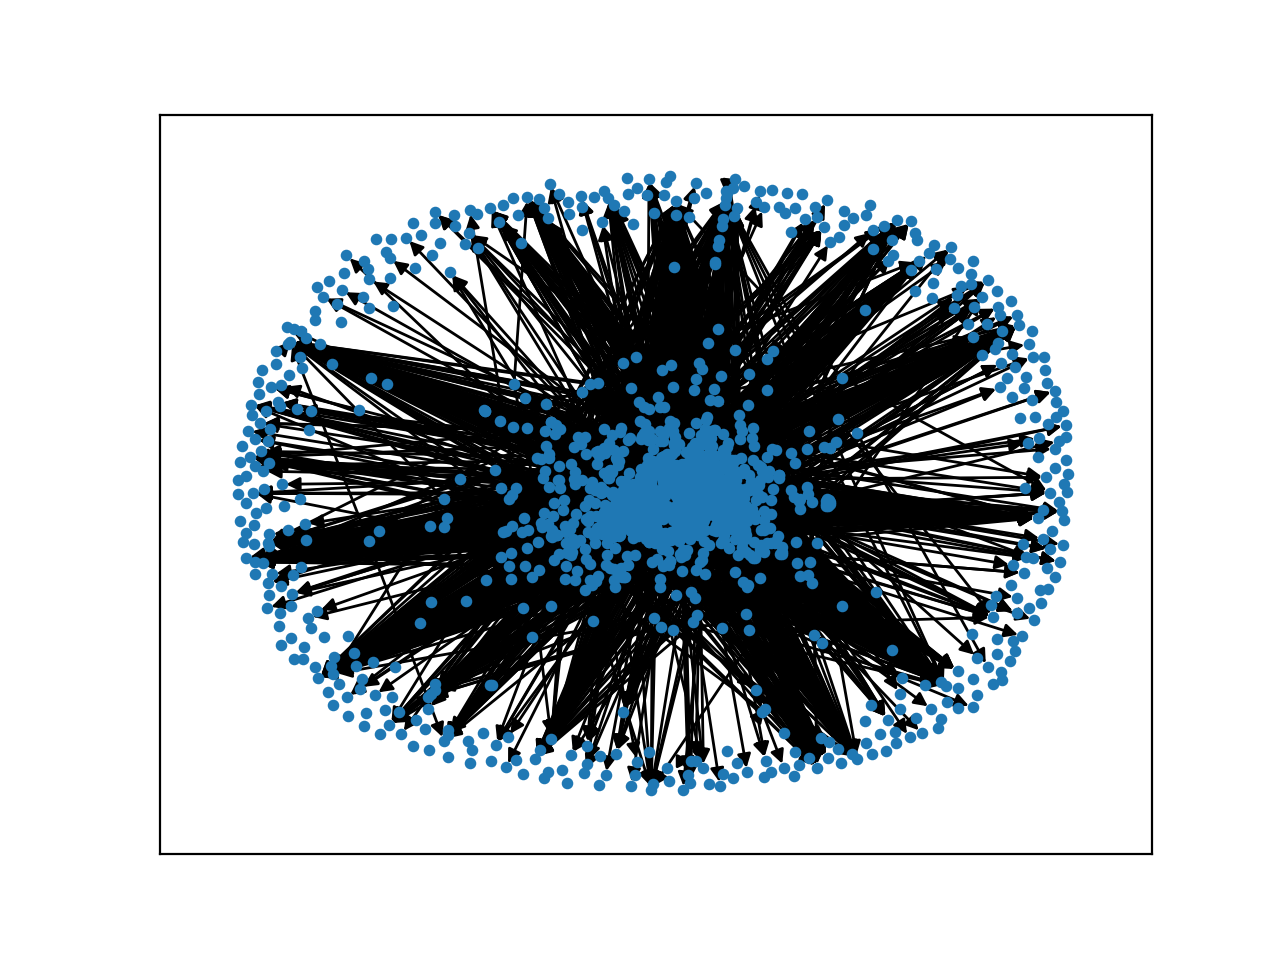

In [108]:
# subG = np.random.choice(G1nodes,400)
# k = G1.subgraph(subG)  
k =G2

plt.figure()
nx.draw_networkx(k, pos=pos,with_labels=False,node_size=10)

In [ ]:

# nx.draw(G1)

### Output on file

In [35]:
outfile = 'RD/'+outnet+'.dat'
# nx.write_weighted_edgelist(G, '../data/input/'+outnet+'.dat')
nx.write_weighted_edgelist(G2, outfile)
print(outfile)

RD/polblogs.dat
